## Redes Recurrentes / Redes Neuronales Recurrentes y Prophet para Predicción de Series Temporales (Core)

Descripción:

En este ejercicio, implementarás una red neuronal recurrente (RNN) utilizando LSTM para predecir valores futuros en una serie temporal. Además, se te pide que explores el uso de la herramienta Prophet, un modelo de predicción de series temporales desarrollado por Facebook, y compares los resultados obtenidos con los de la RNN.

Objetivo:

El objetivo es predecir los valores futuros de una serie temporal utilizando redes recurrentes y comparar su rendimiento con Prophet. Este ejercicio te permitirá explorar dos enfoques distintos para la predicción de series temporales.

Instrucciones:

1. Selección del dataset:
  – Utiliza un dataset de series temporales de Kaggle, como el de «Air Quality Prediction» o cualquier otro relacionado con predicción de demanda, precios de acciones, etc. Puedes elegir el dataset que más se relacione con tus intereses.
  – Enlace sugerido: [Air Quality Prediction](https://www.kaggle.com/competitions/air-quality-prediction)

2. Preprocesamiento de datos:
  – Realiza una exploración inicial de la serie temporal, incluyendo la visualización de la tendencia y la estacionalidad si es aplicable.
  – Realiza un escalado de los datos, ya que las redes neuronales recurrentes se benefician de que los datos estén en un rango similar.

3. Implementación de RNN con LSTM:
  – Implementa una red LSTM para predecir la serie temporal. Utiliza una arquitectura simple con una capa LSTM y una capa densa para predecir el valor futuro de la serie temporal.
  – Asegúrate de dividir los datos en conjuntos de entrenamiento y prueba, utilizando las primeras partes de la serie para entrenar el modelo y las últimas partes para probar la precisión de las predicciones.

4. Uso de Prophet:
  – Instala y utiliza Prophet para predecir la misma serie temporal. Prophet es un modelo que maneja fácilmente tendencias y estacionalidades, por lo que es ideal para comparación con redes recurrentes.
  – Entrena Prophet con los mismos datos que utilizaste para la red LSTM y realiza predicciones en el conjunto de prueba.

5. Comparación de resultados:
  – Compara las predicciones de la red LSTM con las predicciones de Prophet. Utiliza métricas como el RMSE (Root Mean Squared Error) o el MAE (Mean Absolute Error) para medir la precisión de ambos modelos.
  – Visualiza las predicciones de ambos modelos superpuestas a la serie temporal original para ver cuál se ajusta mejor a los datos.

6. Análisis y discusión:
  – Discute cuál de los modelos ofrece mejores resultados en este caso particular. ¿Por qué crees que Prophet o la red LSTM tuvieron un mejor rendimiento?
  – Reflexiona sobre las ventajas y desventajas de cada enfoque para la predicción de series temporales.

In [15]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

from prophet import Prophet


In [6]:
# Cargar el dataset
file_path = '../data/DELL_daily_data.csv'
data = pd.read_csv(file_path)
print("\nPrimeras filas del dataset:")
print(data.head())

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



Primeras filas del dataset:
         Date       Open       High        Low      Close  Adj Close   Volume
0  2016-08-17  12.207997  12.348319  12.067676  12.067676  11.303945   271519
1  2016-08-18  12.348319  12.348319  11.927354  11.997515  11.238224  1767366
2  2016-08-19  11.983482  12.207997  11.969450  12.207997  11.435387  4735900
3  2016-08-22  12.067676  12.797349  11.955418  12.250094  11.474819  2245909
4  2016-08-23  12.278158  12.881542  12.207997  12.628963  11.829713  1483020


In [7]:
# Selecting the feature (Close prices) and normalizing it
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Splitting data into sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(data_scaled, seq_length)

In [8]:
# Reshape for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
# Building the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 4.7621e-04 - val_loss: 0.0028
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 2.9126e-04 - val_loss: 0.0023
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.2851e-04 - val_loss: 0.0021
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.2551e-04 - val_loss: 0.0021
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 2.0172e-04 - val_loss: 0.0023
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 2.0928e-04 - val_loss: 0.0020
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 2.0867e-04 - val_loss: 0.0020
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.9260e-04 - val_loss: 0.0019
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 1.8960e-04 - val_loss: 0.0019


In [12]:
# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Rescale to original

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


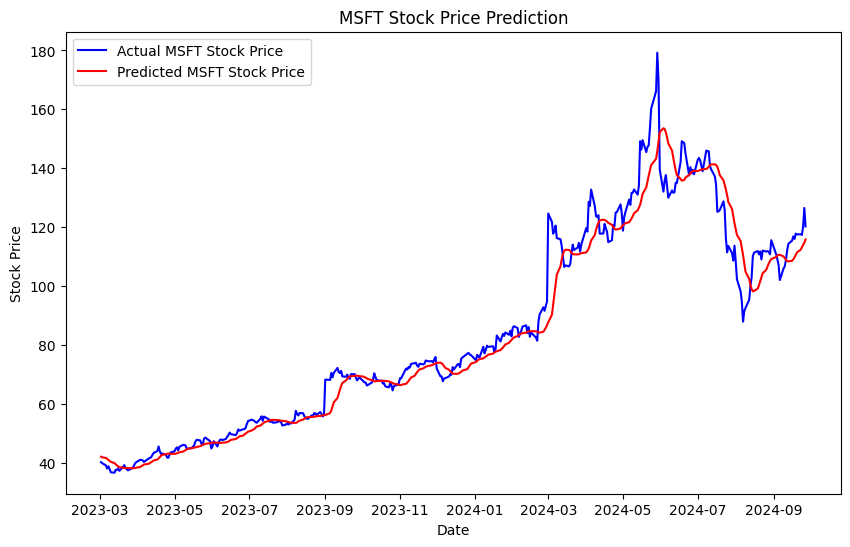

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(predictions):], scaler.inverse_transform(data_scaled[-len(predictions):]), color='blue', label='Actual MSFT Stock Price')
plt.plot(data.index[-len(predictions):], predictions, color='red', label='Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

***
### PROPHET


In [17]:
# Cargar el dataset
file_path = '../data/DELL_daily_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target

In [18]:
# Initialize and fit the model
model = Prophet(daily_seasonality=True)
model.fit(data)

14:28:19 - cmdstanpy - INFO - Chain [1] start processing
14:28:20 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Create a dataframe to hold future dates for prediction
future = model.make_future_dataframe(periods=365)  # Predict 1 year into the future
forecast = model.predict(future)

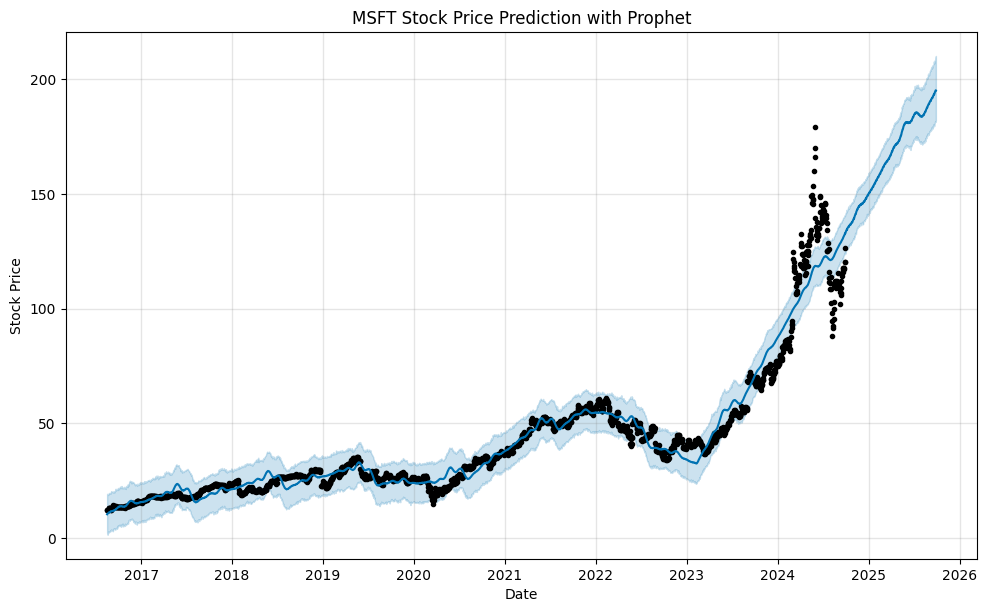

In [20]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title("MSFT Stock Price Prediction with Prophet")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

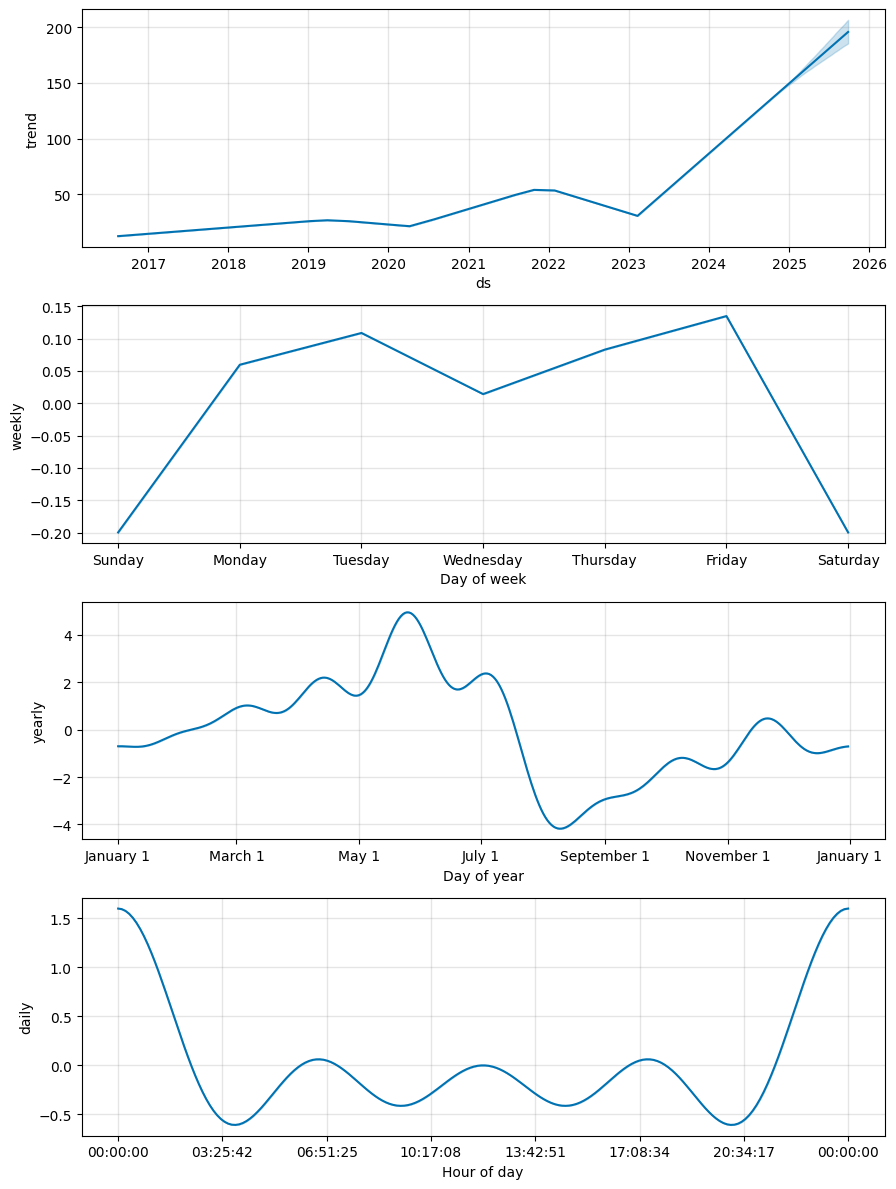

In [21]:
# Optional: Plot components like trend and yearly seasonality
fig2 = model.plot_components(forecast)
plt.show()

14:29:26 - cmdstanpy - INFO - Chain [1] start processing
14:29:26 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1/10


c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0060 - val_loss: 0.0024
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4.5987e-04 - val_loss: 0.0025
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 2.7820e-04 - val_loss: 0.0023
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.2287e-04 - val_loss: 0.0022
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 2.4056e-04 - val_loss: 0.0022
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.2434e-04 - val_loss: 0.0021
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.1796e-04 - val_loss: 0.0022
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.7979e-04 - val_loss: 0.0021
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1.8896e-04 - val_loss: 0.0020
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.6035e-04 - val_loss: 0.0025
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


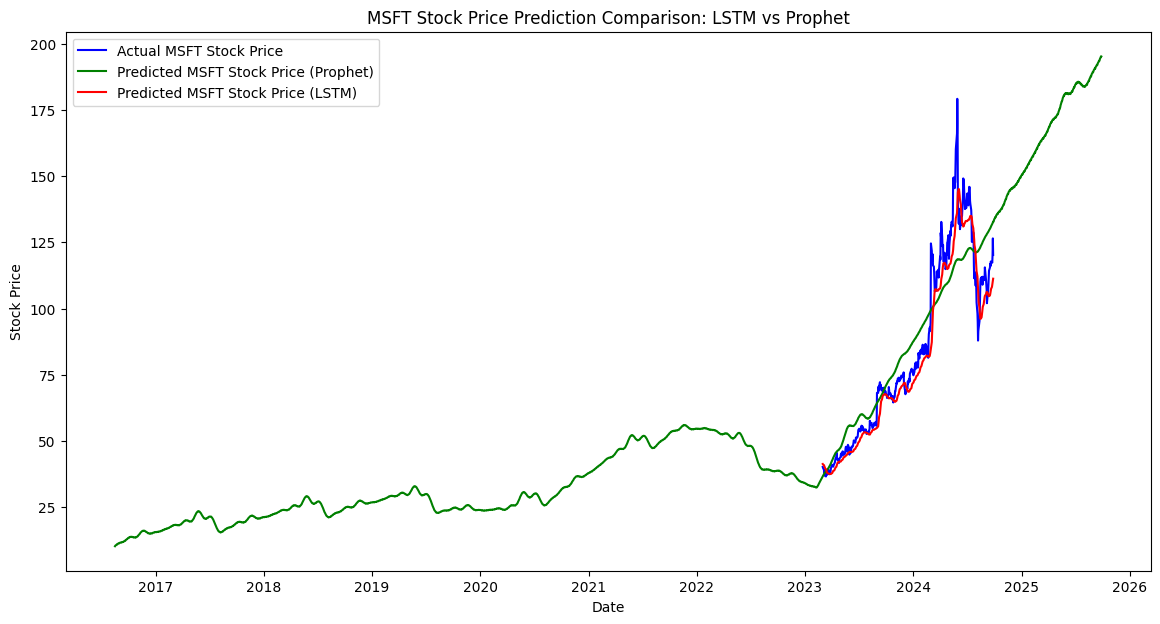

In [22]:
# Cargar el dataset
file_path = '../data/DELL_daily_data.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Prophet Model
data_prophet = data[['Close']].reset_index()
data_prophet.columns = ['ds', 'y']  # Prophet requires these column names

# Initialize and fit Prophet model
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(data_prophet)

# Create future dates for prediction
future = model_prophet.make_future_dataframe(periods=365)
forecast_prophet = model_prophet.predict(future)

# Normalize data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Create sequences for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(data_scaled, seq_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and train LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Make predictions with LSTM
lstm_predictions = model_lstm.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plotting the comparison
plt.figure(figsize=(14, 7))
# Actual stock price
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual MSFT Stock Price')
# Prophet predictions
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], color='green', label='Predicted MSFT Stock Price (Prophet)')
# LSTM predictions
plt.plot(data.index[-len(lstm_predictions):], lstm_predictions, color='red', label='Predicted MSFT Stock Price (LSTM)')
plt.title('MSFT Stock Price Prediction Comparison: LSTM vs Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()